In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.cm as cm

In [33]:
games = pd.read_csv('Video_games_esrb_rating.csv')
print (games)

                                  title  console  alcohol_reference  \
0            Monster Jam Steel Titans 2        1                  0   
1                Subnautica: Below Zero        1                  0   
2     NIER REPLICANT VER.1.22474487139…        1                  0   
3                            Jamestown+        0                  0   
4                Neptunia Virtual Stars        0                  0   
...                                 ...      ...                ...   
1890   SENRAN KAGURA Peach Beach Splash        0                  0   
1891                       Sneaky Bears        0                  0   
1892                              SPARC        0                  0   
1893                         Still Time        0                  0   
1894                  Surf World Series        1                  0   

      animated_blood  blood  blood_and_gore  cartoon_violence  crude_humor  \
0                  0      0               0                 0        

In [34]:
games.dropna(inplace=True)
print(games)

                                  title  console  alcohol_reference  \
0            Monster Jam Steel Titans 2        1                  0   
1                Subnautica: Below Zero        1                  0   
2     NIER REPLICANT VER.1.22474487139…        1                  0   
3                            Jamestown+        0                  0   
4                Neptunia Virtual Stars        0                  0   
...                                 ...      ...                ...   
1890   SENRAN KAGURA Peach Beach Splash        0                  0   
1891                       Sneaky Bears        0                  0   
1892                              SPARC        0                  0   
1893                         Still Time        0                  0   
1894                  Surf World Series        1                  0   

      animated_blood  blood  blood_and_gore  cartoon_violence  crude_humor  \
0                  0      0               0                 0        

In [35]:
games = games.drop(['title'],axis = 1)
print (games)

      console  alcohol_reference  animated_blood  blood  blood_and_gore  \
0           1                  0               0      0               0   
1           1                  0               1      0               0   
2           1                  0               0      1               0   
3           0                  0               0      0               0   
4           0                  0               0      0               0   
...       ...                ...             ...    ...             ...   
1890        0                  0               0      0               0   
1891        0                  0               0      0               0   
1892        0                  0               0      0               0   
1893        0                  0               0      1               0   
1894        1                  0               0      0               0   

      cartoon_violence  crude_humor  drug_reference  fantasy_violence  \
0                    0    

In [36]:
label_encoder = LabelEncoder()

categorical_features = ["esrb_rating"]
for feature in categorical_features:
    print(games[feature].unique())
    games[feature]=label_encoder.fit_transform(games[feature])
    print(games[feature].unique())

['E' 'ET' 'M' 'T']
[0 1 2 3]


In [37]:
#Аналіз головних компонентів

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(games)

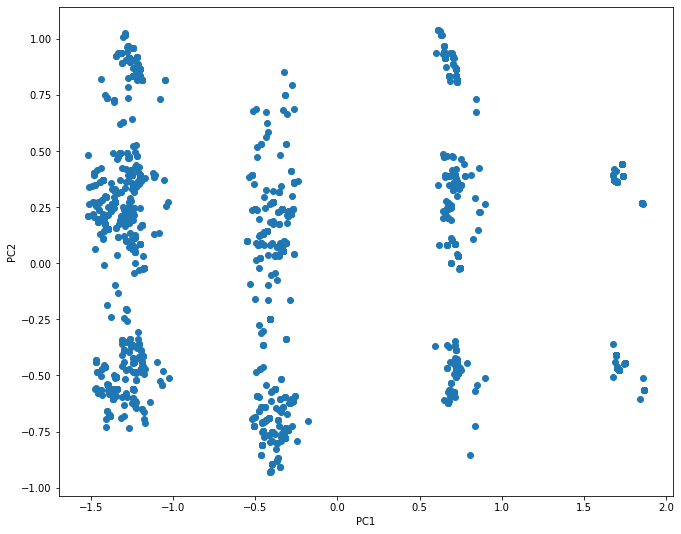

In [38]:
fig, ax = plt.subplots(figsize = (11, 9))

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

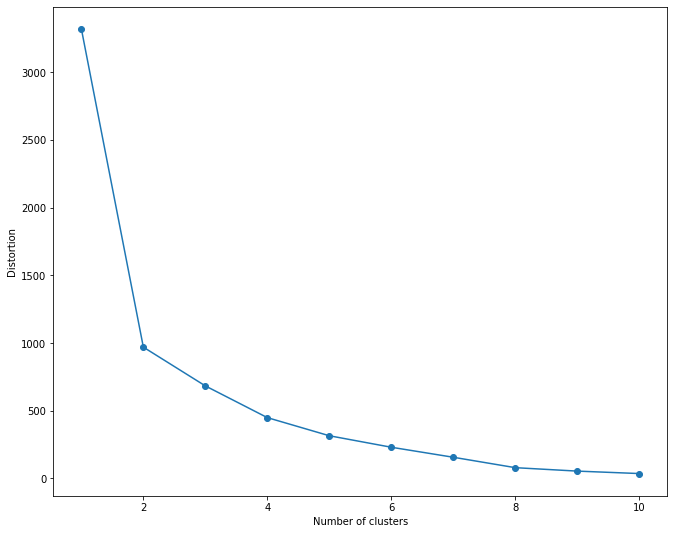

In [39]:
#Шукаємо кількість кластерів

fig, ax = plt.subplots(figsize = (11, 9))

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(pca_data)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [40]:
print('Найкраща кількість кластерів = 2')

Найкраща кількість кластерів = 2


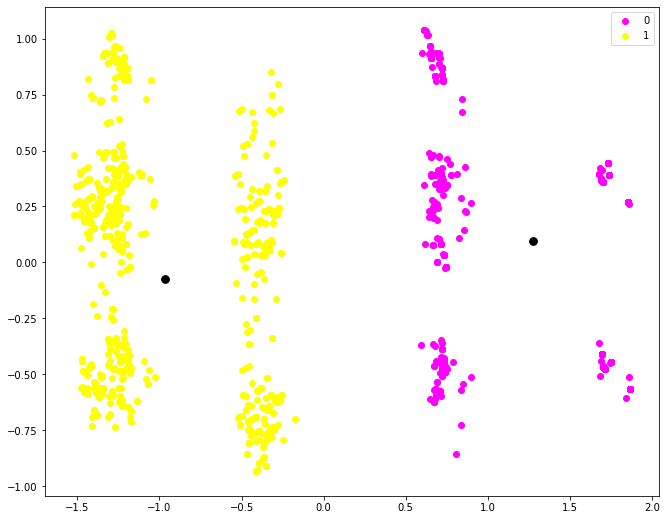

In [41]:
#K-means clustering

fig, ax = plt.subplots(figsize = (11, 9))

km = KMeans(n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=2)
y_km = km.fit_predict(pca_data)
centroids = km.cluster_centers_
u_labels = np.unique(y_km)
colors = cm.spring(np.linspace(0, 1, u_labels.shape[0]))

for i, color in zip(u_labels, colors):
    filtered_label = pca_data[y_km == i]
    plt.scatter(filtered_label[:,0], filtered_label[:,1], label = i, color=color)
    
plt.scatter(centroids[:,0], centroids[:,1], s=60, color='k')
plt.legend()
plt.show()

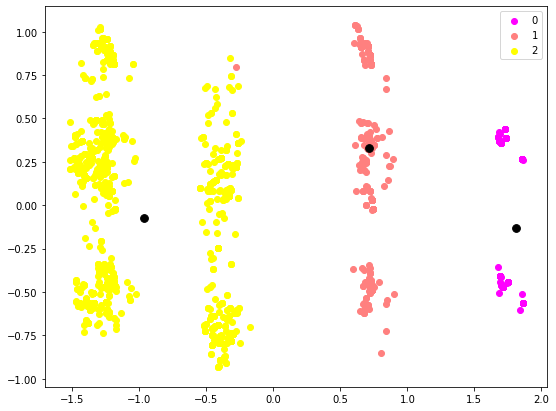

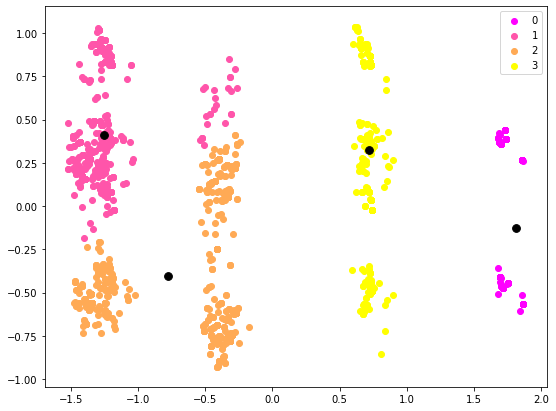

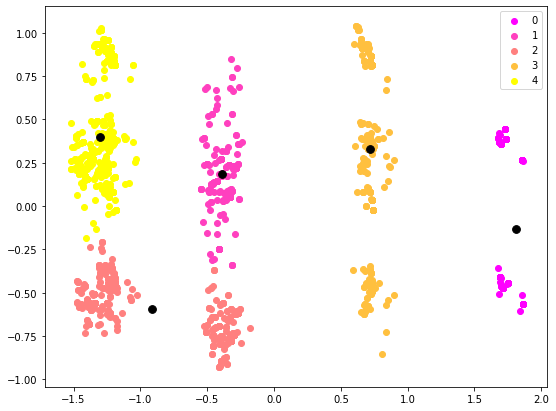

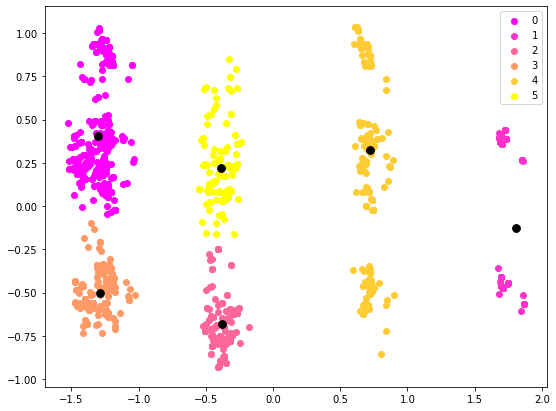

In [43]:
for j in range(3, 7):
    
    fig, ax = plt.subplots(figsize = (9, 7))
    
    km = KMeans(n_clusters=j, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=2)

    y_km = km.fit_predict(pca_data)
    centroids = km.cluster_centers_
    u_labels = np.unique(y_km)
    colors = cm.spring(np.linspace(0, 1, u_labels.shape[0]))
    
    for i, color in zip(u_labels, colors):
        filtered_label = pca_data[y_km == i]
        plt.scatter(filtered_label[:,0], filtered_label[:,1], label = i, color=color)
    
    plt.scatter(centroids[:,0], centroids[:,1], s=60, color='k')
    plt.legend()
    plt.show()